# __Extracted Tweets Data Analyis__

In [1]:
import matplotlib.pyplot as plt
import os, json, datetime
import seaborn as sns
import pandas as pd
from modules import utils
from modules import preprocessing as pp

In [2]:
DATA_PATH = 'data/tweets/'

week_list = utils.load_week_list(DATA_PATH)
print('Amount of extracted weeks: ', len(week_list))

Amount of extracted weeks:  26


In [3]:
print(week_list)

['week_01', 'week_02', 'week_03', 'week_04', 'week_05', 'week_06', 'week_07', 'week_08', 'week_09', 'week_10', 'week_11', 'week_12', 'week_pr_01', 'week_pr_02', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_pr_03', 'week_18', 'week_19', 'week_20', 'week_21', 'week_pr_04', 'week_22']


In [4]:
days = []
tts_amount = {
    'week': {
        'query_ext': [],
        'hashtag_ext': []
    },
    'day': {
        'query_ext': [],
        'hashtag_ext': []
    }
}
frequent_top_10_hashtags = {
    'query_ext': [],
    'hashtag_ext': []
}

for week in week_list:
    for file in os.listdir(DATA_PATH+week):
        if file.endswith('.json'):
            with open(f'{DATA_PATH+week}/{file}', encoding='utf-8') as week_info:
                data = json.load(week_info)
                tts_amount['week']['query_ext'].append(data['tweets_amount']['query_ext'])
                tts_amount['week']['hashtag_ext'].append(data['tweets_amount']['hashtag_ext'])
                for hashtag in data['top_10_hashtags']['query_ext']:
                    frequent_top_10_hashtags['query_ext'].append(hashtag)
                for hashtag in data['top_10_hashtags']['hashtag_ext']:
                    frequent_top_10_hashtags['hashtag_ext'].append(hashtag)
                for day in data['days_info']:
                    days.append(f'{week}_{day}')
                    tts_amount['day']['query_ext'].append(data['days_info'][day]['tweets_amount']['query_ext'])
                    tts_amount['day']['hashtag_ext'].append(data['days_info'][day]['tweets_amount']['hashtag_ext'])

## __Quantitative Analysis__

### __Tweets Amount__

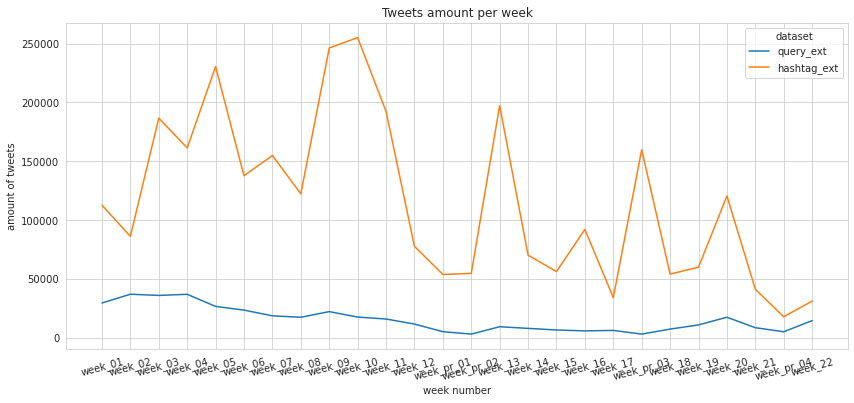

In [5]:
weekly_tts_amount = pd.DataFrame(tts_amount['week'])
weekly_tts_amount['week'] = week_list

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.lineplot(x='week', y='value', hue='dataset', data=pd.melt(weekly_tts_amount, ['week']).rename(columns={'variable':'dataset'}))
ax.set(xlabel='week number', ylabel='amount of tweets')
plt.title('Tweets amount per week')
plt.xticks(rotation=15)
plt.show()

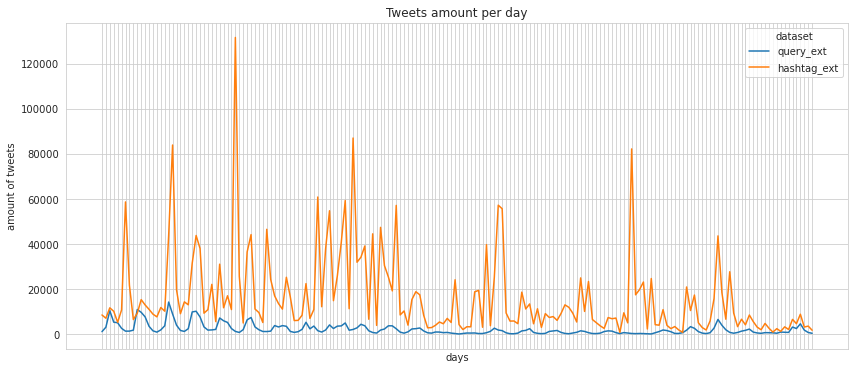

In [6]:
daily_tts_amount = pd.DataFrame(tts_amount['day'])
daily_tts_amount['day'] = days

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.lineplot(x='day', y='value', hue='dataset', data=pd.melt(daily_tts_amount, ['day']).rename(columns={'variable':'dataset'}))
ax.set(xlabel='days', ylabel='amount of tweets')
plt.title('Tweets amount per day')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

In [7]:
print(f'''
Total number of weeks: {len(week_list)}

Total number of tweets:
- Query dataset: {sum(tts_amount['week']['query_ext'])}
- Hashtag dataset: {sum(tts_amount['week']['hashtag_ext'])}

Weeks with the highest amount of tweets:
- Query dataset: 
{weekly_tts_amount.sort_values(by='query_ext', ascending=False)[:5][['week','query_ext']].values.tolist()}
- Hashtag dataset: 
{weekly_tts_amount.sort_values(by='hashtag_ext', ascending=False)[:5][['week','hashtag_ext']].values.tolist()}

Days with the highest amount of tweets:
- Query dataset:
{daily_tts_amount.sort_values(by='query_ext', ascending=False)[:5][['day', 'query_ext']].values.tolist()}
- Hashtag dataset:
{daily_tts_amount.sort_values(by='hashtag_ext', ascending=False)[:5][['day', 'hashtag_ext']].values.tolist()}
''')


Total number of weeks: 26

Total number of tweets:
- Query dataset: 407291
- Hashtag dataset: 3007717

Weeks with the highest amount of tweets:
- Query dataset: 
[['week_02', 37097], ['week_04', 37037], ['week_03', 36058], ['week_01', 29618], ['week_05', 26749]]
- Hashtag dataset: 
[['week_10', 255016], ['week_09', 246175], ['week_05', 230436], ['week_13', 197249], ['week_11', 192390]]

Days with the highest amount of tweets:
- Query dataset:
[['week_03_day_4', 14333], ['week_02_day_3', 11035], ['week_01_day_3', 10495], ['week_04_day_4', 10262], ['week_04_day_3', 9957]]
- Hashtag dataset:
[['week_05_day_7', 131549], ['week_10_day_2', 87000], ['week_03_day_5', 83904], ['week_pr_03_day_3', 82177], ['week_08_day_7', 60863]]



### __User Amount__

In [8]:
file_lists = {}
user_count = {
    'query_ext': [],
    'hashtag_ext': []
}

for week in week_list:
    query_users = []
    hashtag_users = []
    file_lists[week] = {
        'query_ext': [],
        'hashtag_ext': []
    }
    for file in os.listdir(DATA_PATH+week):
        if file.endswith('query_ext.parquet'):
            file_lists[week]['query_ext'].append(file)
        if file.endswith('hashtags_ext.parquet'):
            file_lists[week]['hashtag_ext'].append(file)
    file_lists[week]['query_ext'].sort()
    file_lists[week]['hashtag_ext'].sort()

    for file in file_lists[week]['query_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for user in df['user']:
            query_users.append(eval(user)['username'])
    user_count['query_ext'].append(len(set(query_users)))
    for file in file_lists[week]['hashtag_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for user in df['user']:
            hashtag_users.append(eval(user)['username'])
    user_count['hashtag_ext'].append(len(set(hashtag_users)))

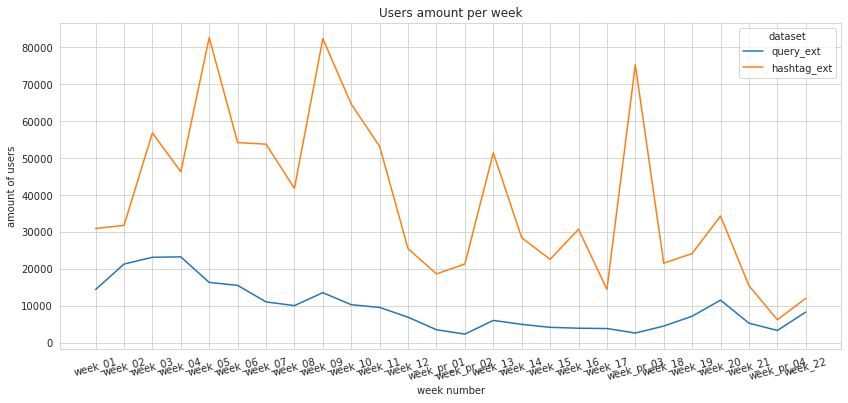

In [9]:
user_count_df = pd.DataFrame(user_count)
user_count_df['week'] = week_list

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.lineplot(x='week', y='value', hue='dataset', data=pd.melt(user_count_df, ['week']).rename(columns={'variable':'dataset'}))
ax.set(xlabel='week number', ylabel='amount of users')
plt.title('Users amount per week')
plt.xticks(rotation=15)
plt.show()

## __Qualitative Analysis__

### __Hashtag Analysis__

#### Most frequent hashtags in the Top 10

In [10]:
pd.Series(frequent_top_10_hashtags['query_ext']).value_counts()[:10]

#forabolsonaro            22
#cpidapandemia            20
#cpi                      19
#cpidacovid               18
#forabolsonarogenocida    16
#pandemia                 15
#cpidocirco               14
#brasil                   12
#covid                    12
#covid19                  10
dtype: int64

In [11]:
pd.Series(frequent_top_10_hashtags['hashtag_ext']).value_counts()[:10]

#forabolsonaro            7
#bolsonaro2022            5
#fakenews                 5
#cpidapandemia            5
#cpidacovid19             5
#vacinassalvamvidas       4
#impeachmentja            4
#vacina                   4
#forabol卐onarogenocida    4
#coronavac                3
dtype: int64

#### Most frequent hashtags throughout the period

In [12]:
hashtags = {
    'query_ext': [],
    'hashtag_ext': []
}

for week in week_list:
    for file in file_lists[week]['query_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for hashtag_list in df['hashtags']:
            hashtag_list = eval(hashtag_list)
            if hashtag_list:
                for hashtag in hashtag_list:
                    hashtags['query_ext'].append(hashtag.lower())
    for file in file_lists[week]['hashtag_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for hashtag_list in df['hashtags']:
            hashtag_list = eval(hashtag_list)
            if hashtag_list:
                for hashtag in hashtag_list:
                    hashtags['hashtag_ext'].append(hashtag.lower())

In [13]:
pd.Series(hashtags['query_ext']).value_counts()[:10]

cpidacovid        10235
cpidapandemia      4285
cpi                3078
forabolsonaro      2149
cpidocirco         1550
globonews          1441
covid              1179
pandemia           1145
cpidogenocidio     1086
covid19            1068
dtype: int64

In [14]:
pd.Series(hashtags['hashtag_ext']).value_counts()[:10]

cpidacovid               606651
forabolsonaro            594875
forabolsonarogenocida    150344
cpidapandemia            142701
renanvagabundo           115794
cpidocirco               111482
renansabiadetudo          88848
29mforabolsonaro          79660
euautorizopresidente      79111
bolsonarogenocida         57089
dtype: int64

### __Topic Analysis__

In [15]:
import re, string
import nltk

In [16]:
docs = {
    'query_ext': [],
    'hashtag_ext': []
}

for week in week_list:
    for file in file_lists[week]['query_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for tweet in df['content']:
            docs['query_ext'].append(tweet)
    for file in file_lists[week]['hashtag_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for tweet in df['content']:
            docs['hashtag_ext'].append(tweet)
   
# removing duplicated tweets
for key in docs:
    tweets_series = pd.Series(docs[key])
    tweets_series.drop_duplicates(inplace=True)
    docs[key] = tweets_series.tolist()

#### Preprocessing Pipeline

In [17]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words.extend(['pra', 'tá', 'sobre', 'ser', 'vai', 'ouve'])

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    return emoji_pattern.sub(r'', tweet)

def remove_link(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'bit.ly/\S+', '', tweet)
    tweet = tweet.strip('[link]')
    tweet = re.sub(r'pic.twitter\S+', '', tweet)
    return tweet

def remove_users(tweet):
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    return tweet

def remove_hashtags(tweet):
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    return tweet

def remove_av(tweet):
    tweet = re.sub(r'VIDEO:', '', tweet)
    tweet = re.sub(r'AUDIO:', '', tweet)
    return tweet

def tweet_preproc(tweet):
    '''
    Remove: @mentions, #hashtags, URL
    links, punctuation and emojis,
    and multiple white spaces
    '''
    tweet = remove_emoji(tweet)
    tweet = remove_link(tweet)
    tweet = remove_users(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = re.sub(r'\d', '', tweet)
    tweet = tweet.lower()
    tweet = [word for word in tweet.split() if len(word)>2 and word not in stop_words]

    return tweet


In [18]:
for key in docs:
    doc = []
    for tweet in docs[key]:
        doc.append(tweet_preproc(tweet))
    docs[key] = doc

In [19]:
 print(f'''
Amount of tweets
- Query dataset: {len(docs['query_ext'])}
- Hashtag dataset: {len(docs['hashtag_ext'])}
''')


Amount of tweets
- Query dataset: 404559
- Hashtag dataset: 2965552



In [20]:
docs['query_ext'][0]

['cpi',
 'covid',
 'faz',
 'rir',
 'jovem',
 'bando',
 'corrupto',
 'fazer',
 'alguma',
 'coisa',
 'além',
 'proselitismo',
 'político',
 'estude',
 'definição',
 'genocídio',
 'pare',
 'passar',
 'vergonha',
 'cairão',
 'lado',
 'mil',
 'direita',
 'serás',
 'atingindo']

In [21]:
docs['hashtag_ext'][0]

['fique', 'certo', 'extrema', 'esquerda', 'contra']

#### __LDA Topic Modeling__

In [22]:
import gensim
from gensim import corpora as corpora
import pyLDAvis.gensim_models
import pyLDAvis
import pickle

__QUERY DATASET__

In [23]:
# create dictionary
id2word = corpora.Dictionary(docs['query_ext'])

# create corpus
texts = docs['query_ext']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


In [24]:
from pprint import pprint

# number of topics
num_topics = 10

# build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.073*"cpi" + 0.053*"covid" + 0.019*"pandemia" + 0.016*"bolsonaro" + '
  '0.015*"prevent" + 0.012*"senior" + 0.010*"presidente" + 0.010*"diz" + '
  '0.010*"senador" + 0.010*"tratamento"'),
 (1,
  '0.072*"cpi" + 0.055*"covid" + 0.028*"brasil" + 0.016*"pandemia" + '
  '0.009*"mil" + 0.009*"mortes" + 0.009*"bolsonaro" + 0.007*"vacina" + '
  '0.007*"governo" + 0.006*"país"'),
 (2,
  '0.061*"cpi" + 0.048*"covid" + 0.014*"pandemia" + 0.010*"empresa" + '
  '0.010*"bolsonaro" + 0.010*"lula" + 0.009*"diretor" + 0.007*"voto" + '
  '0.005*"anos" + 0.005*"brasil"'),
 (3,
  '0.095*"cpi" + 0.081*"covid" + 0.009*"ver" + 0.008*"pandemia" + 0.007*"hoje" '
  '+ 0.005*"gente" + 0.005*"agora" + 0.005*"tudo" + 0.005*"bolsonaro" + '
  '0.004*"dia"'),
 (4,
  '0.088*"cpi" + 0.068*"covid" + 0.018*"presidente" + 0.018*"aziz" + '
  '0.016*"omar" + 0.014*"pandemia" + 0.012*"senador" + 0.011*"depoimento" + '
  '0.007*"relatório" + 0.007*"bolsonaro"'),
 (5,
  '0.088*"cpi" + 0.072*"covid" + 0.014*"pandemia" 

In [25]:
#pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)

/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import 

In [26]:
del id2word, texts, corpus

__HASHTAGS DATASET__

In [27]:
# create dictionary
id2word = corpora.Dictionary(docs['hashtag_ext'])

# create corpus
texts = docs['hashtag_ext']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [28]:
from pprint import pprint

# number of topics
num_topics = 10

# build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.021*"cara" + 0.013*"pode" + 0.011*"gente" + 0.011*"vou" + 0.010*"coisa" + '
  '0.010*"falar" + 0.009*"quero" + 0.009*"ver" + 0.008*"vagabundo" + '
  '0.008*"dizer"'),
 (1,
  '0.020*"vergonha" + 0.018*"brasil" + 0.016*"país" + 0.012*"genocida" + '
  '0.012*"governo" + 0.010*"bolsonaro" + 0.010*"hora" + 0.009*"desse" + '
  '0.007*"verdade" + 0.006*"desgoverno"'),
 (2,
  '0.054*"bolsonaro" + 0.028*"sforabolsonaro" + 0.022*"presidente" + '
  '0.018*"brasil" + 0.013*"ruas" + 0.011*"melhor" + 0.010*"contra" + '
  '0.010*"povo" + 0.010*"parabéns" + 0.009*"setembro"'),
 (3,
  '0.095*"dia" + 0.043*"bom" + 0.041*"vamos" + 0.041*"hoje" + 0.018*"boa" + '
  '0.015*"fortaleça" + 0.013*"sim" + 0.010*"amanhã" + 0.008*"tag" + '
  '0.008*"todos"'),
 (4,
  '0.031*"senador" + 0.021*"marcos" + 0.020*"rogério" + 0.012*"prevent" + '
  '0.012*"fake" + 0.011*"news" + 0.010*"cpi" + 0.010*"havan" + 0.008*"senior" '
  '+ 0.008*"omar"'),
 (5,
  '0.053*"povo" + 0.023*"sempre" + 0.020*"brasileiro" + 0.016*

In [29]:
#pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)

/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import 

In [30]:
del id2word, texts, corpus

#### Train STTM Model

In [31]:
from gsdmm import MovieGroupProcess # loading gsdmm model

 __QUERY DATASET__

In [32]:
vocab = set(x for doc in docs['query_ext'] for x in doc)
n_terms = len(vocab)

print(f'''
QUERY DATASET
Vocabulary size: {n_terms}
Number of documents: {len(docs['query_ext'])}
''')


QUERY DATASET
Vocabulary size: 130808
Number of documents: 404559



In [33]:
mgp = MovieGroupProcess(K=15, alpha=0.10, beta=0.10, n_iters=30)

y = mgp.fit(docs['query_ext'], n_terms)

In stage 0: transferred 363207 clusters with 15 clusters populated
In stage 1: transferred 258756 clusters with 15 clusters populated
In stage 2: transferred 148897 clusters with 15 clusters populated
In stage 3: transferred 104118 clusters with 15 clusters populated
In stage 4: transferred 87157 clusters with 15 clusters populated
In stage 5: transferred 80382 clusters with 15 clusters populated
In stage 6: transferred 76686 clusters with 15 clusters populated
In stage 7: transferred 74557 clusters with 15 clusters populated
In stage 8: transferred 73470 clusters with 15 clusters populated
In stage 9: transferred 72557 clusters with 15 clusters populated
In stage 10: transferred 72416 clusters with 15 clusters populated
In stage 11: transferred 71857 clusters with 15 clusters populated
In stage 12: transferred 72045 clusters with 15 clusters populated
In stage 13: transferred 71451 clusters with 15 clusters populated
In stage 14: transferred 71377 clusters with 15 clusters populated
I

In [34]:
import numpy as np

doc_count = np.array(mgp.cluster_doc_count)

In [35]:
print('Number of documents per topic: ', doc_count)

Number of documents per topic:  [16273 35345 28073 32291 50383 29582 44380 23982 28195 18893  2140 17877
 14941 47577 14627]


In [36]:
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [ 4 13  6  1  3  5  8  2  7  9 11  0 12 14 10]


In [37]:
# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(mgp.cluster_word_distribution, top_index, 15)


Cluster 4 : [('cpi', 51511), ('covid', 44242), ('pandemia', 6410), ('hoje', 4156), ('dia', 3574), ('assistir', 3198), ('ver', 2914), ('bbb', 2885), ('melhor', 2696), ('gente', 2433), ('assistindo', 2282), ('entretenimento', 2109), ('brasil', 1823), ('vendo', 1721), ('agora', 1685)]

Cluster 13 : [('cpi', 50313), ('covid', 39241), ('pandemia', 9980), ('bolsonaro', 7308), ('presidente', 3816), ('cara', 3763), ('nada', 3537), ('governo', 3262), ('agora', 3218), ('gente', 3151), ('pazuello', 3036), ('tudo', 2836), ('ter', 2620), ('ver', 2581), ('pode', 2487)]

Cluster 6 : [('cpi', 47158), ('covid', 29230), ('pandemia', 18820), ('governo', 9333), ('bolsonaro', 8814), ('brasil', 5860), ('presidente', 4406), ('mortes', 3831), ('contra', 3761), ('vacinas', 3497), ('mil', 3373), ('vacina', 2992), ('país', 2928), ('ter', 2525), ('todos', 2493)]

Cluster 1 : [('cpi', 39625), ('covid', 25804), ('pandemia', 9663), ('renan', 5059), ('presidente', 4743), ('circo', 4003), ('senadores', 3836), ('calhe

### __HASHTAG DATASET__

In [38]:
vocab = set(x for doc in docs['hashtag_ext'] for x in doc)
n_terms = len(vocab)

print(f'''
HASHTAG DATASET
Vocabulary size: {n_terms}
Number of documents: {len(docs['hashtag_ext'])}
''')


HASHTAG DATASET
Vocabulary size: 393927
Number of documents: 2965552



In [39]:
mgp = MovieGroupProcess(K=15, alpha=0.10, beta=0.10, n_iters=30)

y = mgp.fit(docs['hashtag_ext'], n_terms)

In stage 0: transferred 2721403 clusters with 15 clusters populated
In stage 1: transferred 2420126 clusters with 15 clusters populated
In stage 2: transferred 1835901 clusters with 15 clusters populated
In stage 3: transferred 1445414 clusters with 15 clusters populated
In stage 4: transferred 1256831 clusters with 15 clusters populated
In stage 5: transferred 1164637 clusters with 15 clusters populated
In stage 6: transferred 1116703 clusters with 15 clusters populated
In stage 7: transferred 1090495 clusters with 15 clusters populated
In stage 8: transferred 1073691 clusters with 15 clusters populated
In stage 9: transferred 1061314 clusters with 15 clusters populated
In stage 10: transferred 1052323 clusters with 15 clusters populated
In stage 11: transferred 1043407 clusters with 15 clusters populated
In stage 12: transferred 1033984 clusters with 15 clusters populated
In stage 13: transferred 1026981 clusters with 15 clusters populated
In stage 14: transferred 1021959 clusters wi

In [40]:
import numpy as np

doc_count = np.array(mgp.cluster_doc_count)

In [41]:
print('Number of documents per topic: ', doc_count)

Number of documents per topic:  [ 63764 175007 228737 145794 129574 121213 242320 144144 357213 153415
 249880  92666 403694 414547  43584]


In [42]:
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [13 12  8 10  6  2  1  9  3  7  4  5 11  0 14]


In [43]:
# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(mgp.cluster_word_distribution, top_index, 15)


Cluster 13 : [('bolsonaro', 37157), ('agora', 15578), ('ladrão', 14090), ('cara', 13703), ('vagabundo', 13645), ('presidente', 12651), ('gente', 12577), ('genocida', 12558), ('pode', 12533), ('lula', 10567), ('ver', 9088), ('gado', 8814), ('cpi', 8789), ('hoje', 8756), ('tudo', 8693)]

Cluster 12 : [('bolsonaro', 44441), ('brasil', 38115), ('presidente', 27100), ('povo', 24172), ('governo', 24164), ('país', 23808), ('genocida', 22225), ('gente', 19028), ('ainda', 16860), ('todos', 15289), ('contra', 15062), ('dia', 15058), ('tudo', 14681), ('pessoas', 14224), ('mforabolsonaro', 13859)]

Cluster 8 : [('senador', 36480), ('cpi', 27504), ('marcos', 26011), ('rogério', 24428), ('cara', 20384), ('hoje', 19113), ('omar', 14246), ('falar', 13736), ('agora', 12678), ('fala', 12651), ('gente', 12292), ('heinze', 11039), ('renan', 10511), ('falando', 10379), ('vergonha', 9780)]

Cluster 10 : [('dia', 34917), ('bom', 26858), ('vamos', 17791), ('hoje', 15685), ('bora', 14831), ('boa', 12863), ('t